In [11]:
import pandas as pd
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [12]:
twitter_df = pd.read_csv('./train.csv')
twitter_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [13]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [14]:
twitter_df['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

## Text preprocessing

#### 1. Lower case

In [15]:
# Lower case

twitter_df['cleaned_text'] = twitter_df['text'].apply(lambda x: x.lower())
twitter_df.head()

,id,keyword,location,text,target,cleaned_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this #earthquake m...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask. canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,all residents asked to 'shelter in place' are ...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,"13,000 people receive #wildfires evacuation or..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby #alaska as ...


#### 2. Expand the Contrations

In [16]:
# Expand the Contrations
import contractions

ModuleNotFoundError: No module named 'contractions'

In [17]:
# Test
contractions.fix("I'd like to know how I'd done that!")

NameError: name 'contractions' is not defined

In [18]:
# Expanding the Contrations
twitter_df['cleaned_text'] = twitter_df['cleaned_text'].apply(contractions.fix)

NameError: name 'contractions' is not defined

In [9]:
# Checking contractions
print(twitter_df["text"][67])
print(twitter_df["cleaned_text"][67])

'I can't have kids cuz I got in a bicycle accident &amp; split my testicles. it's impossible for me to have kids' MICHAEL YOU ARE THE FATHER
'i can't have kids cuz i got in a bicycle accident &amp; split my testicles. it's impossible for me to have kids' michael you are the father


#### 3. Noise Removal

3.1 Remove URLs

In [19]:
import re
def remove_URL(text):
    """
        Remove URLs from a simple string
    """
    return re.sub(r"https?://\S+|www\.\S+", "", text)

In [20]:
# remove url from the text
twitter_df['cleaned_text'] = twitter_df['cleaned_text'].apply(remove_URL)

In [21]:
# Checking
print(twitter_df["text"][31])
print(twitter_df["cleaned_text"][31])

@bbcmtd Wholesale Markets ablaze http://t.co/lHYXEOHY6C
@bbcmtd wholesale markets ablaze 


3.2 Remove HTML tags

In [22]:
def remove_html_tag(text):
    """
        Remove html tags from a simple text
    """
    html_tag = re.compile(r"<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});")
    return re.sub(html_tag, "", text)

In [23]:
# remove html tags from text
twitter_df['cleaned_text'] = twitter_df['cleaned_text'].apply(remove_html_tag)

In [24]:
# Checking
print(twitter_df["text"][62])
print(twitter_df["cleaned_text"][62])

Rene Ablaze &amp; Jacinta - Secret 2k13 (Fallen Skies Edit) - Mar 30 2013  https://t.co/7MLMsUzV1Z
rene ablaze  jacinta - secret 2k13 (fallen skies edit) - mar 30 2013  


3.3 Remove Non-ASCI:

In [25]:
def removal_non_ascii(text):
    return re.sub(r'[^\x00-\x7f]', '', text)

In [26]:
twitter_df['cleaned_text'] = twitter_df['cleaned_text'].apply(removal_non_ascii)

In [27]:
# Checking
print(twitter_df["text"][38])
print(twitter_df["cleaned_text"][38])

Barbados #Bridgetown JAMAICA ÛÒ Two cars set ablaze: SANTA CRUZ ÛÓ Head of the St Elizabeth Police Superintende...  http://t.co/wDUEaj8Q4J
barbados #bridgetown jamaica  two cars set ablaze: santa cruz  head of the st elizabeth police superintende...  


#### 4. Remove punctuations

In [28]:
import string
def remove_punc(text):
#     return re.sub(r'[]!"$%&\'()*+,./:;=#@?[\\^_`{|}~-]+', "", text)
    return text.translate(str.maketrans('', '', string.punctuation))

In [29]:
twitter_df['cleaned_text'] = twitter_df['cleaned_text'].apply(remove_punc)

In [30]:
# Checking
print(twitter_df["text"][5])
print(twitter_df["cleaned_text"][5])

#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires
rockyfire update  california hwy 20 closed in both directions due to lake county fire  cafire wildfires


#### 5. Tokeinzation

In [31]:
from nltk.tokenize import word_tokenize

twitter_df['tokenized'] = twitter_df['cleaned_text'].apply(word_tokenize)
twitter_df.head()

,id,keyword,location,text,target,cleaned_text,tokenized
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake ma...,"[our, deeds, are, the, reason, of, this, earth..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,"[forest, fire, near, la, ronge, sask, canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...,"[all, residents, asked, to, shelter, in, place..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfires evacuation orde...,"[13000, people, receive, wildfires, evacuation..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as s...,"[just, got, sent, this, photo, from, ruby, ala..."


#### 6.Removing stopwords

In [32]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /zfs/hybrilit.jinr.ru/user/a/astankus/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [33]:
stop = set(stopwords.words('english'))
twitter_df['stopwords_removed'] = twitter_df['tokenized'].apply(lambda x: [word for word in x if word not in stop])
twitter_df.head()

,id,keyword,location,text,target,cleaned_text,tokenized,stopwords_removed
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake ma...,"[our, deeds, are, the, reason, of, this, earth...","[deeds, reason, earthquake, may, allah, forgiv..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,"[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, ronge, sask, canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...,"[all, residents, asked, to, shelter, in, place...","[residents, asked, shelter, place, notified, o..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfires evacuation orde...,"[13000, people, receive, wildfires, evacuation...","[13000, people, receive, wildfires, evacuation..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as s...,"[just, got, sent, this, photo, from, ruby, ala...","[got, sent, photo, ruby, alaska, smoke, wildfi..."


#### 7. Stemming

In [34]:
from nltk.stem import PorterStemmer

def porter_stemmer(text):
    
    stemmer = PorterStemmer()
    stems = [stemmer.stem(word) for word in text]
    return stems

In [35]:
twitter_df['porter_stemmer'] = twitter_df['stopwords_removed'].apply(porter_stemmer)
twitter_df.head()

,id,keyword,location,text,target,cleaned_text,tokenized,stopwords_removed,porter_stemmer
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake ma...,"[our, deeds, are, the, reason, of, this, earth...","[deeds, reason, earthquake, may, allah, forgiv...","[deed, reason, earthquak, may, allah, forgiv, us]"
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,"[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, rong, sask, canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...,"[all, residents, asked, to, shelter, in, place...","[residents, asked, shelter, place, notified, o...","[resid, ask, shelter, place, notifi, offic, ev..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfires evacuation orde...,"[13000, people, receive, wildfires, evacuation...","[13000, people, receive, wildfires, evacuation...","[13000, peopl, receiv, wildfir, evacu, order, ..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as s...,"[just, got, sent, this, photo, from, ruby, ala...","[got, sent, photo, ruby, alaska, smoke, wildfi...","[got, sent, photo, rubi, alaska, smoke, wildfi..."


### 8. Lemmatization

In [36]:
from nltk.stem import WordNetLemmatizer

def lemmatize_word(text):
    """
        Lemmatize the tokenized words
    """

    lemmatizer = WordNetLemmatizer()
    lemma = [lemmatizer.lemmatize(word, tag) for word, tag in text]
    return lemma

In [37]:
lemmatizer = WordNetLemmatizer()

twitter_df['lemmatize_word'] = twitter_df['stopwords_removed'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
twitter_df.head()

,id,keyword,location,text,target,cleaned_text,tokenized,stopwords_removed,porter_stemmer,lemmatize_word
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake ma...,"[our, deeds, are, the, reason, of, this, earth...","[deeds, reason, earthquake, may, allah, forgiv...","[deed, reason, earthquak, may, allah, forgiv, us]","[deed, reason, earthquake, may, allah, forgive..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,"[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, rong, sask, canada]","[forest, fire, near, la, ronge, sask, canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...,"[all, residents, asked, to, shelter, in, place...","[residents, asked, shelter, place, notified, o...","[resid, ask, shelter, place, notifi, offic, ev...","[resident, asked, shelter, place, notified, of..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfires evacuation orde...,"[13000, people, receive, wildfires, evacuation...","[13000, people, receive, wildfires, evacuation...","[13000, peopl, receiv, wildfir, evacu, order, ...","[13000, people, receive, wildfire, evacuation,..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as s...,"[just, got, sent, this, photo, from, ruby, ala...","[got, sent, photo, ruby, alaska, smoke, wildfi...","[got, sent, photo, rubi, alaska, smoke, wildfi...","[got, sent, photo, ruby, alaska, smoke, wildfi..."


In [38]:
twitter_df['porter_stemmer_joined'] = twitter_df['porter_stemmer'].apply(lambda x: ' '.join(x))
twitter_df['lemmatize_word_joined'] = twitter_df['lemmatize_word'].apply(lambda x: ' '.join(x))

### 9. CountVectorizer

In [39]:
from sklearn.pipeline import Pipeline

In [40]:
def check_preporcessing_methods_with_prediction(X, y, alpha = list(np.linspace(1,50,10))):
    
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state = 1)
    pipeline = Pipeline([('CountVectorizer', feature_extraction.text.CountVectorizer()), ('classifier', linear_model.RidgeClassifier())])
    parametrs = {'classifier__alpha': alpha,
             'classifier__class_weight': [None, 'balanced'],
             'classifier__copy_X': [True],
             'classifier__fit_intercept': [True],
             'classifier__max_iter': [None],
             'classifier__normalize': [False],
             'classifier__random_state': [0],
             'classifier__solver': ['auto'],
             'classifier__tol': [0.001]}
    clf_grid = GridSearchCV(pipeline, param_grid=parametrs, cv = 3)
    clf_grid.fit(X_train, y_train)
    print('Best Score:', clf_grid.best_score_)
    print('Best Params', clf_grid.best_params_)

In [41]:
check_preporcessing_methods_with_prediction(twitter_df['porter_stemmer_joined'],twitter_df['target'], list(np.linspace(7,16,15)) )

Best Score: 0.7976878612716763
Best Params {'classifier__alpha': 15.357142857142858, 'classifier__class_weight': None, 'classifier__copy_X': True, 'classifier__fit_intercept': True, 'classifier__max_iter': None, 'classifier__normalize': False, 'classifier__random_state': 0, 'classifier__solver': 'auto', 'classifier__tol': 0.001}


In [42]:
check_preporcessing_methods_with_prediction(twitter_df['lemmatize_word_joined'],twitter_df['target'] ,list(np.linspace(24,28,15)))

Best Score: 0.7947101068488353
Best Params {'classifier__alpha': 24.285714285714285, 'classifier__class_weight': 'balanced', 'classifier__copy_X': True, 'classifier__fit_intercept': True, 'classifier__max_iter': None, 'classifier__normalize': False, 'classifier__random_state': 0, 'classifier__solver': 'auto', 'classifier__tol': 0.001}


In [43]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(twitter_df['text'], twitter_df['target'], random_state = 0)

In [44]:
count_vectorizer = feature_extraction.text.CountVectorizer()
train_vectors = count_vectorizer.fit_transform(X_train)
test_vectors = count_vectorizer.transform(X_test)

In [45]:
ridge_model_clf = linear_model.RidgeClassifier()

In [46]:
cv_scores = model_selection.cross_val_score(ridge_model_clf, train_vectors, y_train, cv = 3, scoring='f1')

In [47]:
cv_scores

array([0.70806658, 0.72286079, 0.73398058])

In [48]:
ridge_model_clf.fit(train_vectors, y_train)

RidgeClassifier()

In [49]:
prediction = ridge_model_clf.predict(test_vectors)

In [50]:
from sklearn.metrics import f1_score

In [51]:
f1_score(prediction, y_test)

0.7345309381237526

In [43]:
twitter_test = pd.read_csv(r'E:\Python\Datasets\Disaster_Tweets\test.csv')


FileNotFoundError: [Errno 2] File E:\Python\Datasets\Disaster_Tweets\test.csv does not exist: 'E:\\Python\\Datasets\\Disaster_Tweets\\test.csv'

In [ ]:
twitter_test.head()

In [ ]:
ridge_model_clf.get_params()

In [ ]:


pipeline = Pipeline([('CountVectorizer', feature_extraction.text.CountVectorizer()), ('classifier', linear_model.RidgeClassifier())])

In [ ]:
parametrs = {'classifier__alpha': list(np.linspace(1,50,10)),
             'classifier__class_weight': [None, 'balanced'],
             'classifier__copy_X': [True],
             'classifier__fit_intercept': [True],
             'classifier__max_iter': [None],
             'classifier__normalize': [False],
             'classifier__random_state': [0],
             'classifier__solver': ['auto'],
             'classifier__tol': [0.001]}
clf_grid = GridSearchCV(pipeline, param_grid=parametrs, cv = 3)
clf_grid.fit(X_train, y_train)

In [ ]:
clf_grid.best_score_

In [ ]:
clf_grid.best_params_

In [ ]:
clf_best = linear_model.RidgeClassifier(alpha = 21)

In [ ]:
clf_best.fit(train_vectors, y_train)


In [ ]:
f1_score(clf_best.predict(test_vectors),y_test)

In [ ]:
cv_scores = model_selection.cross_val_score(clf_best, train_vectors, y_train, cv = 3, scoring='f1')
cv_scores.mean()

In [ ]:
clf_grid.best_params_

In [ ]:
parametrs = {'alpha': [0.1],
             'class_weight': [None, 'balanced'],
             'copy_X': [True],
             'fit_intercept': [True],
             'max_iter': [None],
             'normalize': [False],
             'random_state': [0],
             'solver': ['auto'],
             'tol': [0.001]}
clf_grid = GridSearchCV(ridge_model_clf, param_grid=parametrs, cv = 3)
clf_grid.fit(train_vectors, y_train)

In [ ]:
clf_grid.best_score_

### 10. TF-IDF Vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

def TFIDF(data, ngram = 1):
    tfidf_x = TfidfVectorizer(ngram_range = (ngram, ngram))
    emb = tfidf_x.fit_transform(data).toarray()
    return emb, tfidf_x

In [ ]:
def check_preporcessing_methods_with_prediction(X, y, alpha = list(np.linspace(1,50,10))):
    
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state = 1)
    pipeline = Pipeline([('TfidfVectorizer', TfidfVectorizer()), ('classifier', linear_model.RidgeClassifier())])
    parametrs = {'classifier__alpha': alpha,
             'classifier__class_weight': [None, 'balanced'],
             'classifier__copy_X': [True],
             'classifier__fit_intercept': [True],
             'classifier__max_iter': [None],
             'classifier__normalize': [False],
             'classifier__random_state': [0],
             'classifier__solver': ['auto'],
             'classifier__tol': [0.001],
             'TfidfVectorizer__ngram_range': [(1,1), (1,2), (1,3)]}
    clf_grid = GridSearchCV(pipeline, param_grid=parametrs, cv = 3, scoring= 'f1')
    clf_grid.fit(X, y)
    print('Best Score:', clf_grid.best_score_)
    print('Best Params', clf_grid.best_params_)

In [ ]:
check_preporcessing_methods_with_prediction(twitter_df['porter_stemmer_joined'],twitter_df['target'], list(np.linspace(0.1,20,15)) )

In [ ]:
check_preporcessing_methods_with_prediction(twitter_df['lemmatize_word_joined'],twitter_df['target'], list(np.linspace(0.1,20,15)) )

### 11. Word2vec averaging

In [52]:
import gensim

In [53]:
word2vec_path = ('./GoogleNews-vectors-negative300.bin')
word2vec_model = gensim.models.KeyedVectors.load_word2vec_format(word2vec_path, binary = True, limit = None)

In [54]:
def get_average_vec(tokens_list, vector, generate_missing=False, k=300):
    """
        Calculate average embedding value of sentence from each word vector
    """
    
    if len(tokens_list)<1:
        return np.zeros(k)
    
    if generate_missing:
        vectorized = [vector[word] if word in vector else np.random.rand(k) for word in tokens_list]
    else:
        vectorized = [vector[word] if word in vector else np.zeros(k) for word in tokens_list]
    
    length = len(vectorized)
    summed = np.sum(vectorized, axis=0)
    averaged = np.divide(summed, length)
    return averaged.tolist()

In [55]:
def get_embeddings(vectors, text, generate_missing=False, k=300):
    """
        create the sentence embedding
    """
    embeddings = text.apply(lambda x: get_average_vec(x, vectors, generate_missing=generate_missing, k=k))
    return list(embeddings)

In [49]:
twitter_df['word2vec_averaged_vector'] = twitter_df['lemmatize_word'].apply(lambda x: get_average_vec(x,\
                                                    word2vec_model,generate_missing = True,k= 300))

In [50]:
# twitter_df['word2vec_averaged_vector'] = twitter_df['word2vec_averaged_vector'].apply(lambda x: x.astype('float64'))

In [51]:
def check_results(X, y, alpha = list(np.linspace(1,50,10))):
    X = X.tolist()

    parametrs = {'alpha': alpha,
             'class_weight': [None, 'balanced'],
             'copy_X': [True],
             'fit_intercept': [True],
             'max_iter': [None],
             'normalize': [False],
             'random_state': [0],
             'solver': ['auto'],
             'tol': [0.001]}
    clf_grid = GridSearchCV(linear_model.RidgeClassifier(), param_grid=parametrs, cv = 3, scoring= 'f1', error_score='raise')
    clf_grid.fit(X, y)
    print('Best Score:', clf_grid.best_score_)
    print('Best Params', clf_grid.best_params_)

In [52]:
check_results(twitter_df['word2vec_averaged_vector'],twitter_df['target'], list(np.linspace(40,50,20)) )

Best Score: 0.7223784653140221
Best Params {'alpha': 49.473684210526315, 'class_weight': 'balanced', 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': False, 'random_state': 0, 'solver': 'auto', 'tol': 0.001}


In [ ]:
ridge =linear_model.RidgeClassifier(alpha = 1)
train_vectors = twitter_df['word2vec_averaged_vector'].tolist()
y_train = twitter_df['target']
cv_scores = model_selection.cross_val_score(ridge, train_vectors, y_train, cv = 4, scoring='f1')

In [ ]:
cv_scores

In [ ]:
cv_scores = model_selection.cross_val_score(ridge_model_clf, train_vectors, y_train, cv = 3, scoring='f1')

In [ ]:
for el in twitter_df['word2vec_averaged_vector'][:3]:
    print(el.dtype)

In [ ]:
twitter_df['word2vec_averaged_vector'][0]

In [ ]:
b.astype('float64')

In [ ]:
twitter_df.info()

In [ ]:
a[0]

### 12. Word2Vec LSTM

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import defaultdict
from collections import  Counter
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tqdm import tqdm
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,LSTM,Dense,SpatialDropout1D
from tensorflow.keras.initializers import Constant
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Recall, Precision

In [57]:
corpus = twitter_df['lemmatize_word'].tolist()

In [58]:
MAX_LEN=50
tokenizer_obj=Tokenizer()
tokenizer_obj.fit_on_texts(corpus)
sequences=tokenizer_obj.texts_to_sequences(corpus)

tweet_pad=pad_sequences(sequences,maxlen=MAX_LEN,truncating='post',padding='post')

In [59]:
word_index=tokenizer_obj.word_index
print('Number of unique words:',len(word_index))

Number of unique words: 16302


In [60]:
num_words=len(word_index)+1
embedding_matrix=np.zeros((num_words,300))

for word,i in tqdm(word_index.items()):
    if i > num_words:
        continue
    
    if word in word2vec_model:
        embedding_matrix[i]= word2vec_model[word]

100%|██████████| 16302/16302 [00:00<00:00, 199264.28it/s]


In [61]:
from tensorflow.keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [62]:
model = Sequential()

embedding = Embedding(num_words, 300, embeddings_initializer=Constant(embedding_matrix), \
                      input_length=MAX_LEN, trainable=False)

model.add(embedding)
model.add(SpatialDropout1D(0.2))
model.add(LSTM(300, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

optimizer = Adam(learning_rate=1e-5)

model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy', Precision(), Recall()])

In [63]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 300)           4890900   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 50, 300)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 300)               721200    
_________________________________________________________________
dense (Dense)                (None, 1)                 301       
Total params: 5,612,401
Trainable params: 721,501
Non-trainable params: 4,890,900
_________________________________________________________________


In [64]:


X_train,X_test,y_train,y_test=train_test_split(tweet_pad,twitter_df['target'].values,test_size=0.15)
print('Shape of train',X_train.shape)
print("Shape of Validation ",X_test.shape)



Shape of train (6471, 50)
Shape of Validation  (1142, 50)


In [66]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "3"


In [67]:
history=model.fit(X_train,y_train,batch_size=32,epochs=45,validation_data=(X_test,y_test),verbose=1)

Epoch 1/45
203/203 [==============================] - 28s 136ms/step - loss: 0.6916 - accuracy: 0.5636 - precision: 0.2647 - recall: 0.0032 - val_loss: 0.6809 - val_accuracy: 0.5972 - val_precision: 1.0000 - val_recall: 0.0065
Epoch 2/45
203/203 [==============================] - 27s 135ms/step - loss: 0.5577 - accuracy: 0.7123 - precision: 0.7351 - recall: 0.5267 - val_loss: 0.4866 - val_accuracy: 0.7916 - val_precision: 0.7419 - val_recall: 0.7451
Epoch 3/45
203/203 [==============================] - 27s 135ms/step - loss: 0.4924 - accuracy: 0.7701 - precision: 0.7592 - recall: 0.6884 - val_loss: 0.4661 - val_accuracy: 0.7977 - val_precision: 0.7661 - val_recall: 0.7214
Epoch 4/45
203/203 [==============================] - 27s 134ms/step - loss: 0.4836 - accuracy: 0.7759 - precision: 0.7742 - recall: 0.6827 - val_loss: 0.4583 - val_accuracy: 0.8039 - val_precision: 0.7852 - val_recall: 0.7106
Epoch 5/45
203/203 [==============================] - 27s 134ms/step - loss: 0.4759 - accura

In [76]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'precision', 'recall', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall'])

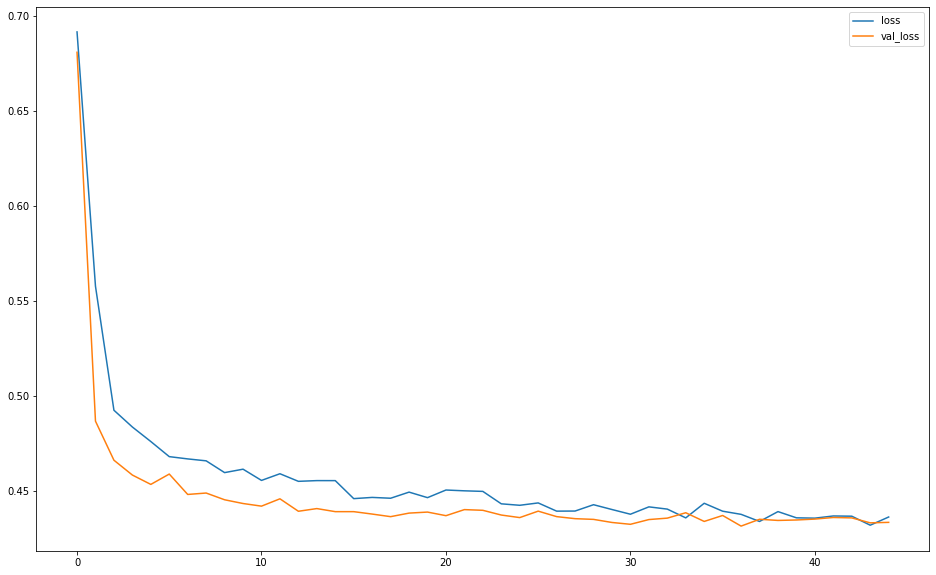

In [83]:
plt.figure(figsize=(16, 10))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend(loc='upper right')

## Making submission predicition LSTM

In [85]:
twitter_test = pd.read_csv('./test.csv')
twitter_test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [86]:
twitter_test['cleaned_text'] = twitter_test['text'].apply(lambda x: x.lower())
twitter_test['cleaned_text'] = twitter_test['cleaned_text'].apply(remove_URL)
twitter_test['cleaned_text'] = twitter_test['cleaned_text'].apply(remove_html_tag)
twitter_test['cleaned_text'] = twitter_test['cleaned_text'].apply(removal_non_ascii)
twitter_test['cleaned_text'] = twitter_test['cleaned_text'].apply(remove_punc)
twitter_test['tokenized'] = twitter_test['cleaned_text'].apply(word_tokenize)
twitter_test['stopwords_removed'] = twitter_test['tokenized'].apply(lambda x: [word for word in x if word not in stop])
twitter_test['lemmatize_word'] = twitter_test['stopwords_removed'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])


In [87]:
corpus_test = twitter_test['lemmatize_word'].tolist()
sequences=tokenizer_obj.texts_to_sequences(corpus_test)

In [90]:
tweet_pad_test = pad_sequences(sequences,maxlen=MAX_LEN,truncating='post',padding='post')

In [97]:
prediction = model.predict(tweet_pad_test)

In [99]:
prediction_rounded = prediction.round()

In [100]:
len(prediction_rounded)

3263

In [105]:
submission = twitter_test[['id']].copy()

In [108]:
submission['target'] = prediction_rounded.astype('int')
submission.head()

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1


In [109]:
submission.to_csv('./submission.csv', index=False)

## Making submission prediction

In [ ]:
count_vectorizer_sumbission = feature_extraction.text.CountVectorizer()

submission_train_vectors = count_vectorizer_sumbission.fit_transform(twitter_df['lemmatize_word_joined'])


In [ ]:
TfidfVectorizer_sumbission = TfidfVectorizer(ngram_range = (1, 2))
submission_train_vectors = TfidfVectorizer_sumbission.fit_transform(twitter_df['lemmatize_word_joined'])


In [ ]:
# Preprocessing
twitter_test = pd.read_csv(r'E:\Python\Datasets\Disaster_Tweets\test.csv')

twitter_test['cleaned_text'] = twitter_test['text'].apply(lambda x: x.lower())
twitter_test['cleaned_text'] = twitter_test['cleaned_text'].apply(contractions.fix)
twitter_test['cleaned_text'] = twitter_test['cleaned_text'].apply(remove_URL)
twitter_test['cleaned_text'] = twitter_test['cleaned_text'].apply(remove_html_tag)
twitter_test['cleaned_text'] = twitter_test['cleaned_text'].apply(removal_non_ascii)
twitter_test['cleaned_text'] = twitter_test['cleaned_text'].apply(remove_punc)
twitter_test['tokenized'] = twitter_test['cleaned_text'].apply(word_tokenize)
twitter_test['stopwords_removed'] = twitter_test['tokenized'].apply(lambda x: [word for word in x if word not in stop])
twitter_test['lemmatize_word'] = twitter_test['stopwords_removed'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
twitter_test['lemmatize_word_joined'] = twitter_test['lemmatize_word'].apply(lambda x: ' '.join(x))


In [ ]:
submission_test_vectors = count_vectorizer_sumbission.transform(twitter_test['lemmatize_word_joined'])

In [ ]:
submission_test_vectors = TfidfVectorizer_sumbission.transform(twitter_test['lemmatize_word_joined'])

In [ ]:
clf_best = linear_model.RidgeClassifier(alpha = 1.5)
clf_best.fit(submission_train_vectors, twitter_df['target'])
submission_prediction = clf_best.predict(submission_test_vectors)

In [ ]:
submission_prediction

In [ ]:
twitter_test.head()

In [ ]:
submission_df = twitter_test[['id']]

In [ ]:
submission_df.head()

In [ ]:
submission_df = twitter_test[['id']].copy()
submission_df['target'] = submission_prediction

In [ ]:
submission_df.head()

In [ ]:
submission_df.to_csv(r'E:\Python\Datasets\Disaster_Tweets\submission.csv', index=False)

## Making submission Word2vec

In [ ]:
twitter_test = pd.read_csv(r'E:\Python\Datasets\Disaster_Tweets\test.csv')


In [ ]:
twitter_test.head()

In [ ]:
twitter_test['cleaned_text'] = twitter_test['text'].apply(lambda x: x.lower())
twitter_test['cleaned_text'] = twitter_test['cleaned_text'].apply(contractions.fix)
twitter_test['cleaned_text'] = twitter_test['cleaned_text'].apply(remove_URL)
twitter_test['cleaned_text'] = twitter_test['cleaned_text'].apply(remove_html_tag)
twitter_test['cleaned_text'] = twitter_test['cleaned_text'].apply(removal_non_ascii)
twitter_test['cleaned_text'] = twitter_test['cleaned_text'].apply(remove_punc)
twitter_test['tokenized'] = twitter_test['cleaned_text'].apply(word_tokenize)
twitter_test['stopwords_removed'] = twitter_test['tokenized'].apply(lambda x: [word for word in x if word not in stop])
twitter_test['lemmatize_word'] = twitter_test['stopwords_removed'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
twitter_test['word2vec_average'] = twitter_test['lemmatize_word'].apply(lambda x: get_average_vec(x, word2vec_model, generate_missing=True))

In [ ]:
ridge_clf = linear_model.RidgeClassifier(alpha = 45)
ridge_clf.fit(twitter_df['word2vec_averaged_vector'].tolist(), twitter_df['target'])
prediction = ridge_clf.predict(twitter_test['word2vec_average'].tolist())

In [ ]:
submission_df = twitter_test[['id']].copy()
submission_df['target'] = prediction

In [ ]:
submission_df.head()

In [ ]:
submission_df.to_csv(r'E:\Python\Datasets\Disaster_Tweets\submission.csv', index = False)